# *Customer Purchase Detection *

In [72]:
# import all the necessary librabies first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
import warnings
warnings.filterwarnings('ignore')                                   # To ignore the unnecessary warnings import warning 

In [74]:
df=pd.read_csv("D:\itvedant\Vscode\Predict Customer Purchase\Customer_purchase_detection.csv")

In [75]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [76]:
df.shape

(1500, 9)

In [77]:
df.size

13500

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [79]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [80]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [81]:
df.duplicated().sum()

112

In [82]:
df.drop_duplicates(inplace=True)

In [83]:
df.duplicated().sum()

0

In [84]:
df.head(2)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0


In [85]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [86]:
df['LoyaltyProgram'].unique()

array([0, 1], dtype=int64)

In [87]:
df['PurchaseStatus'].unique()

array([1, 0], dtype=int64)

In [88]:
# Create a new object for contineous numerical columns in original dataset df

df_new=df.drop(['Gender','ProductCategory','LoyaltyProgram','DiscountsAvailed','PurchaseStatus'],axis=1)

In [89]:
df_new.columns

Index(['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite'], dtype='object')

# Now check the outliers and handled outliers


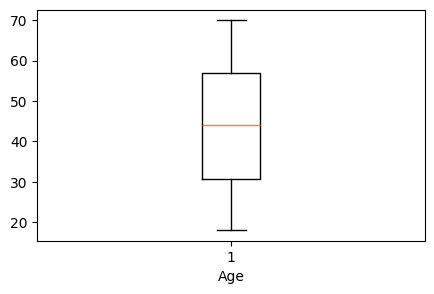

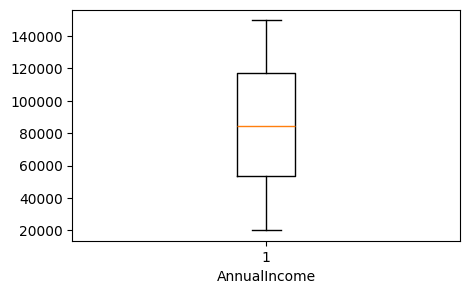

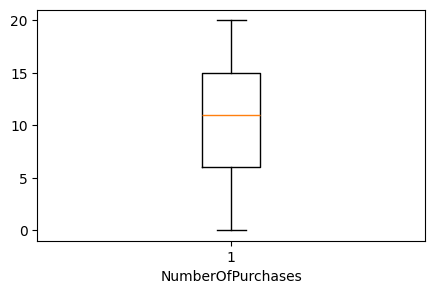

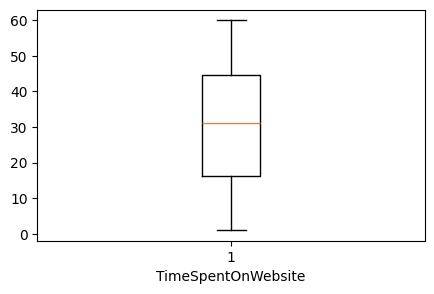

In [90]:
# Boxplot to check the presence of the outliers in numerical dataset 
for col in df_new:
    plt.figure(figsize=(5,3))
    plt.boxplot(df_new[col])
    plt.xlabel(f"{col}")
    plt.show()

In [91]:
"The dataset does not contains any ouliers in it."

'The dataset does not contains any ouliers in it.'

In [92]:
df.head(2)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0


# Now check the skewness of the numerical columns 

In [93]:
for col in df_new:
    print(f"Skewness of {col}=",df_new[col].skew())

Skewness of Age= -0.005481991010222283
Skewness of AnnualIncome= -0.011027119745708547
Skewness of NumberOfPurchases= -0.12602565786005426
Skewness of TimeSpentOnWebsite= -0.052224344863931564


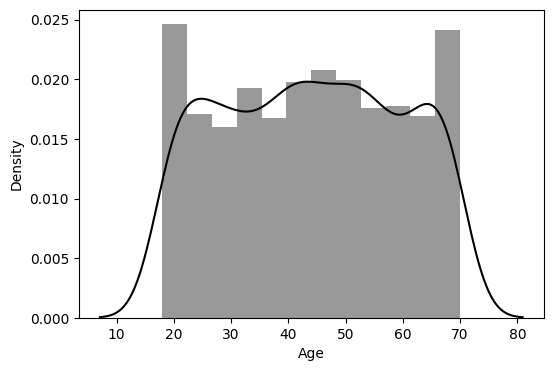

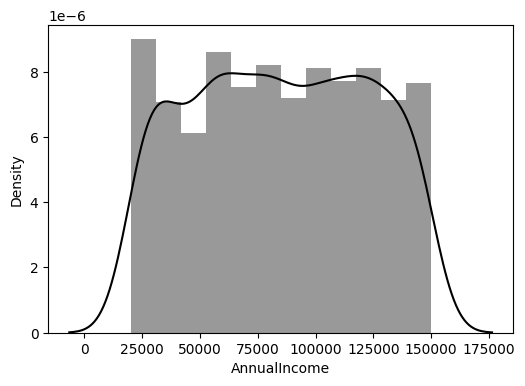

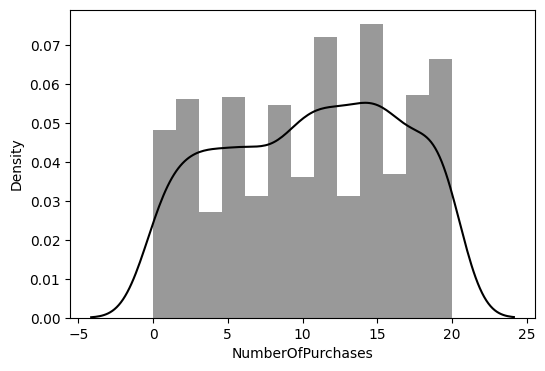

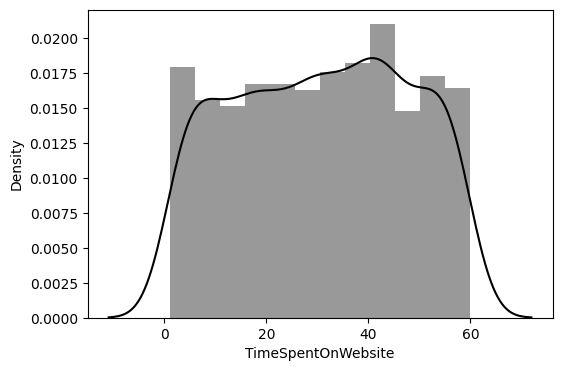

In [94]:
#The skewness of the numerical columns of the dataset also normal,so no need to handled skewness.
for col in df_new:
    plt.figure(figsize=(6,4))
    sns.distplot(df_new[col],color='black')
    plt.show

In [95]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


# Now convert unscaled numerical columns in same range By scaling (Minmax scalar or Normalization)

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scalar=MinMaxScaler()

In [98]:
df['AnnualIncome']=scalar.fit_transform(df[['AnnualIncome']])

df['TimeSpentOnWebsite']=scalar.fit_transform(df[['TimeSpentOnWebsite']])


In [99]:
df.head(2)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,0.355351,8,0,0.500925,0,5,1
1,20,1,0.027571,4,2,0.631052,0,5,0


In [100]:
# Now sepearate the dependent and independent variable 
x=df.drop('PurchaseStatus',axis=1)
y=df['PurchaseStatus']

In [101]:
x.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed'],
      dtype='object')

In [102]:
# check wheather the binary output in the target column is balance or not 
y.value_counts()

PurchaseStatus
0    740
1    648
Name: count, dtype: int64

In [103]:
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [104]:
ros=RandomOverSampler()

In [105]:
x_res,y_res=ros.fit_resample(x,y)

In [106]:
y_res.value_counts()

PurchaseStatus
1    740
0    740
Name: count, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.20, random_state=42)

In [109]:
x_test.shape

(296, 8)

In [110]:
x_train.shape

(1184, 8)

In [111]:
y_test.shape

(296,)

In [112]:
y_train.shape

(1184,)

# Importing Each model form their corresponding lib

In [113]:
# import all the models first 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [114]:
# Define object for each 

knn=KNeighborsClassifier()
lrg=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier()
rd=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()
xg=XGBClassifier()

# Training each model

In [115]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [116]:
lrg.fit(x_train,y_train)                       

LogisticRegression()

In [117]:
svm.fit(x_train,y_train)

SVC()

In [118]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [119]:
rd.fit(x_train,y_train)

RandomForestClassifier()

In [120]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [121]:
gd.fit(x_train,y_train)

GradientBoostingClassifier()

In [122]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [123]:
# calculate y_predict for each algorithm

y_pred_knn=knn.predict(x_test)
y_pred_lrg=lrg.predict(x_test)
y_pred_svm=svm.predict(x_test)
y_pred_dt=dt.predict(x_test)
y_pred_rd=rd.predict(x_test)
y_pred_ad=ad.predict(x_test)
y_pred_gd=gd.predict(x_test)
y_pred_xg=xg.predict(x_test)

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
print("Accuracy Score knn:",accuracy_score(y_test,y_pred_lrg)) 
print("---------------------------------------------------------")  
print("Accuracy Score LogisticReg:",accuracy_score(y_test,y_pred_lrg))                  # Accuracy Score for each the model
print("---------------------------------------------------------")
print("Accuracy Score svm:",accuracy_score(y_test,y_pred_svm))
print("---------------------------------------------------------------")
print("Accuracy Score Decision Tree:",accuracy_score(y_test,y_pred_dt))
print("------------------------------------------------")
print("Accuracy Score Random Forest:",accuracy_score(y_test,y_pred_rd))
print("-------------------------------------------------")
print("Accuracy Score Adaboost:",accuracy_score(y_test,y_pred_ad))
print("----------------------------------------------")
print("Accuracy Score Gradient Decient:",accuracy_score(y_test,y_pred_gd))
print("-------------------------------------------------")
print("Accuracy Score Xgboost:",accuracy_score(y_test,y_pred_xg))



Accuracy Score knn: 0.8209459459459459
---------------------------------------------------------
Accuracy Score LogisticReg: 0.8209459459459459
---------------------------------------------------------
Accuracy Score svm: 0.6722972972972973
---------------------------------------------------------------
Accuracy Score Decision Tree: 0.8648648648648649
------------------------------------------------
Accuracy Score Random Forest: 0.9324324324324325
-------------------------------------------------
Accuracy Score Adaboost: 0.902027027027027
----------------------------------------------
Accuracy Score Gradient Decient: 0.9222972972972973
-------------------------------------------------
Accuracy Score Xgboost: 0.8952702702702703


# Now we get Random Forest as a best model

In [126]:
# To icrease my accuracy score of Random Forest i used the Grid Search CV 

from sklearn.model_selection import GridSearchCV

In [127]:
rd=RandomForestClassifier()

In [128]:
para={'criterion':['gini', 'entropy', 'log_loss'],
      'max_features':['sqrt', 'log2'],
      'class_weight':['balanced', 'balanced_subsample']}

In [129]:
grid_cv=GridSearchCV(estimator=rd,param_grid=para,cv=3)

In [130]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2']})

In [131]:
grid_cv.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'sqrt'}

In [132]:
rd_final=RandomForestClassifier(class_weight='balanced',criterion='gini',max_features='sqrt')

In [133]:
rd_final.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [134]:
y_pred_rd1=rd_final.predict(x_test)

In [135]:
print("Accuracy_score:=",accuracy_score(y_test,y_pred_rd1))

Accuracy_score:= 0.9324324324324325


In [136]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(y_test,y_pred_rd1))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       139
           1       0.95      0.92      0.94       157

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



# Pickle file

In [138]:
import pickle

In [139]:
with open('Customer.pkl','wb') as file:
    pickle.dump(rd_final,file)

In [140]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,0.355351,8,0,0.500925,0,5,1
1,20,1,0.027571,4,2,0.631052,0,5,0
2,27,1,0.830766,11,2,0.518983,1,0,1
3,24,1,0.907642,19,3,0.765512,0,4,1
4,31,1,0.611013,19,1,0.318664,0,0,1


In [141]:
L=[[22,0,22000,4,2,30,1,5]]

In [142]:
rd_final.predict(L)

array([1], dtype=int64)